In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
stock_list=["AAPL","MSFT","GOOG","AMZN","TSLA","^GSPC","NVDA","META","KO","PEP"]
data=yf.download(stock_list,start="2016-01-01",end="2026-01-01")['Close']
print(data.head())

C:\Users\fredd\AppData\Local\Temp\ipykernel_22312\412908566.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock_list,start="2016-01-01",end="2026-01-01")['Close']
[*********************100%***********************]  10 of 10 completed

Ticker           AAPL       AMZN       GOOG         KO        META       MSFT  \
Date                                                                            
2016-01-04  23.753155  31.849501  36.815872  30.964716  101.510918  47.983452   
2016-01-05  23.157919  31.689501  36.852596  31.074249  102.017387  48.202358   
2016-01-06  22.704721  31.632500  36.904213  30.906290  102.255714  47.326740   
2016-01-07  21.746477  30.396999  36.049129  30.395071   97.240730  45.680599   
2016-01-08  21.861469  30.352501  35.457565  30.314749   96.654839  45.820698   

Ticker          NVDA        PEP       TSLA        ^GSPC  
Date                                                     
2016-01-04  0.789588  73.066551  14.894000  2012.660034  
2016-01-05  0.802272  73.569550  14.895333  2016.709961  
2016-01-06  0.769098  73.591759  14.602667  1990.260010  
2016-01-07  0.738607  72.178833  14.376667  1943.089966  
2016-01-08  0.722752  71.912498  14.066667  1922.030029  


In [4]:
price=yf.download("AAPL", start="2024-01-02", end="2024-01-03")['Close']
print(price)

C:\Users\fredd\AppData\Local\Temp\ipykernel_22312\4065934787.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price=yf.download("AAPL", start="2024-01-02", end="2024-01-03")['Close']
[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2024-01-02  183.903214


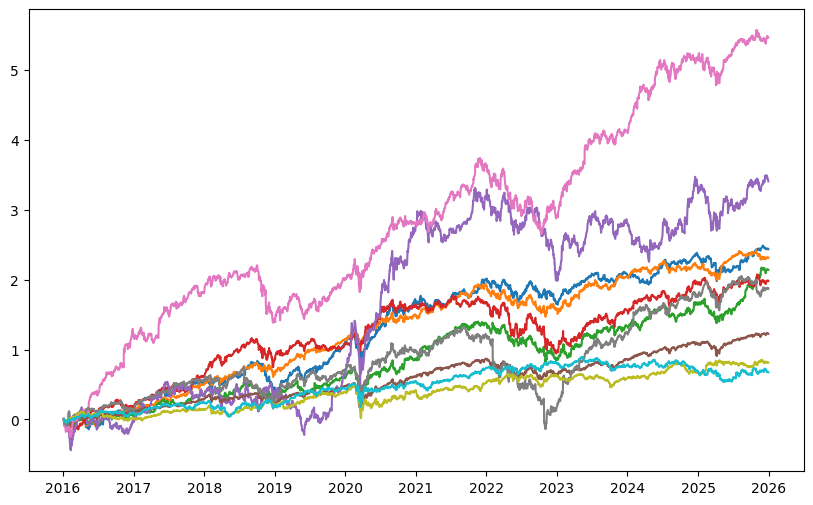

In [5]:

plt.figure(figsize=(10,6))

for stock in stock_list:
    data[stock].dropna(inplace=True)
    log_returns= pd.Series(np.log(data[stock]/data[stock].shift(1))).dropna().cumsum()
    plt.plot(log_returns, label=stock)

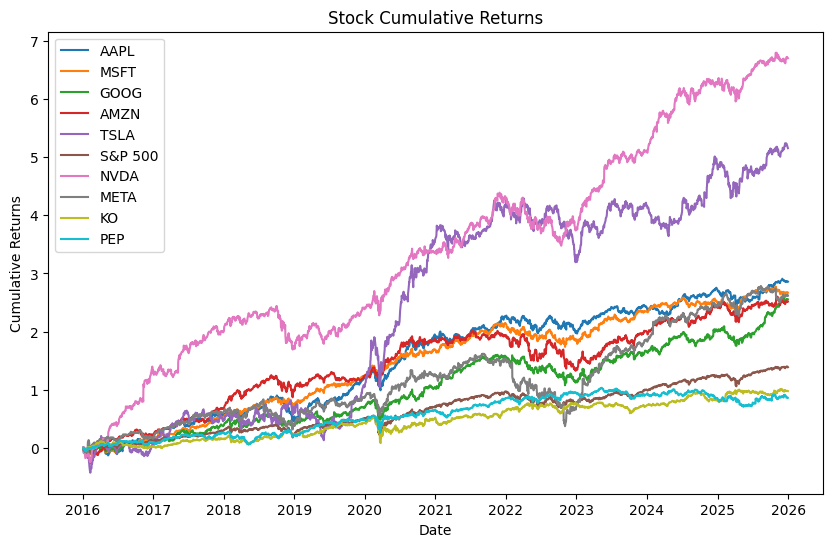

In [6]:
plt.figure(figsize=(10,6))
for stock in stock_list:
    if stock == "^GSPC":
            plt.plot(data[stock].pct_change().cumsum(), label="S&P 500")
    else:
        plt.plot(data[stock].pct_change().cumsum(), label=stock)
    plt.title(f"Stock Cumulative Returns")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()

In [7]:
for stock in stock_list:
    data[stock].dropna(inplace=True)
    log_returns = np.log(data[stock] / data[stock].shift(1)).dropna()
    annual_return= log_returns.mean()*252
    annual_volatility= data[stock].pct_change().std()*np.sqrt(252)
    sharpe=annual_return/annual_volatility
    print(f"{stock} - Annual Return: {annual_return:.2%}, Annual Volatility: {annual_volatility:.2%}, Sharpe Ratio: {sharpe:.2f}")

AAPL - Annual Return: 24.44%, Annual Volatility: 29.05%, Sharpe Ratio: 0.84
MSFT - Annual Return: 23.17%, Annual Volatility: 26.76%, Sharpe Ratio: 0.87
GOOG - Annual Return: 21.49%, Annual Volatility: 28.75%, Sharpe Ratio: 0.75
AMZN - Annual Return: 19.86%, Annual Volatility: 32.80%, Sharpe Ratio: 0.61
TSLA - Annual Return: 34.17%, Annual Volatility: 59.28%, Sharpe Ratio: 0.58
^GSPC - Annual Return: 12.28%, Annual Volatility: 18.13%, Sharpe Ratio: 0.68
NVDA - Annual Return: 54.80%, Annual Volatility: 49.89%, Sharpe Ratio: 1.10
META - Annual Return: 18.77%, Annual Volatility: 38.52%, Sharpe Ratio: 0.49
KO - Annual Return: 8.17%, Annual Volatility: 18.06%, Sharpe Ratio: 0.45
PEP - Annual Return: 6.77%, Annual Volatility: 19.36%, Sharpe Ratio: 0.35


In [9]:

df=pd.DataFrame()
for stock in stock_list:
    df[stock]=data[stock]
print(df.tail())

                  AAPL        MSFT        GOOG        AMZN        TSLA  \
Date                                                                     
2025-12-24  273.809998  488.019989  315.670013  232.380005  485.399994   
2025-12-26  273.399994  487.709991  314.959991  232.520004  475.190002   
2025-12-29  273.760010  487.100006  314.390015  232.070007  459.640015   
2025-12-30  273.079987  487.480011  314.549988  232.529999  454.429993   
2025-12-31  271.859985  483.619995  313.799988  230.820007  449.720001   

                  ^GSPC        NVDA        META         KO         PEP  
Date                                                                    
2025-12-24  6932.049805  188.610001  667.549988  70.110001  143.740005  
2025-12-26  6929.939941  190.529999  663.289978  69.870003  143.779999  
2025-12-29  6905.740234  188.220001  658.690002  70.160004  144.240005  
2025-12-30  6896.240234  187.539993  665.950012  70.070000  144.160004  
2025-12-31  6845.500000  186.500000  660.09

In [15]:
date=pd.Timestamp("2024-06-01")
print(date.year, date.month, date.day)


2024 6 1
